✅ Dataset loaded with headers.
📌 Shape: (581011, 55)
📋 Columns: ['2596', '51', '3', '258', '0', '510', '221', '232', '148', '6279', '1', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '0.10', '0.11', '0.12', '0.13', '0.14', '0.15', '0.16', '0.17', '0.18', '0.19', '0.20', '0.21', '0.22', '0.23', '0.24', '0.25', '0.26', '0.27', '0.28', '0.29', '0.30', '0.31', '1.1', '0.32', '0.33', '0.34', '0.35', '0.36', '0.37', '0.38', '0.39', '0.40', '0.41', '0.42', '5']
   2596   51   3  258    0   510  221  232  148  6279  ...  0.34  0.35  0.36  \
0  2590   56   2  212   -6   390  220  235  151  6225  ...     0     0     0   
1  2804  139   9  268   65  3180  234  238  135  6121  ...     0     0     0   
2  2785  155  18  242  118  3090  238  238  122  6211  ...     0     0     0   
3  2595   45   2  153   -1   391  220  234  150  6172  ...     0     0     0   
4  2579  132   6  300  -15    67  230  237  140  6031  ...     0     0     0   

   0.37  0.38  0.39  0.40  0.41  0.42  5  


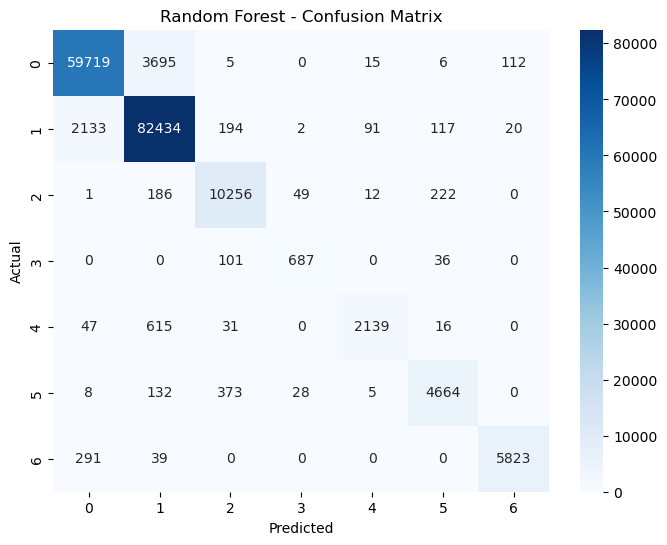

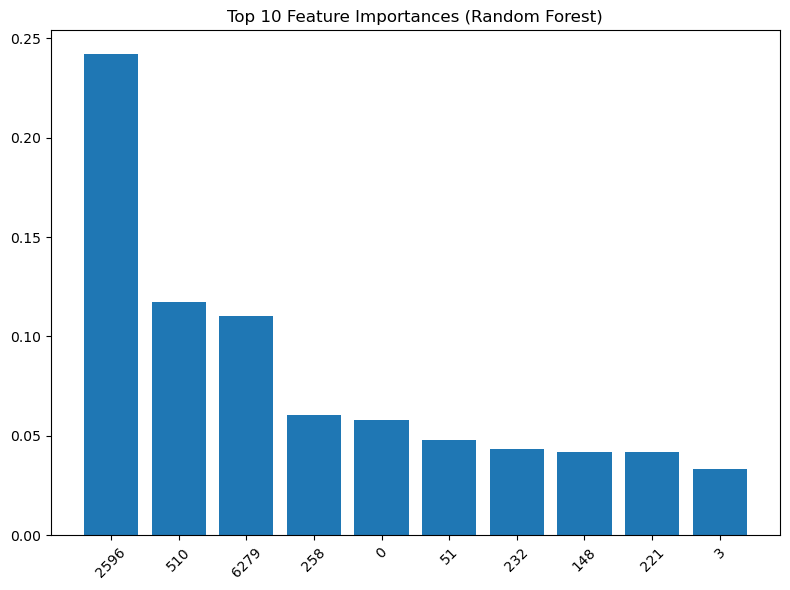


🔍 XGBoost Classification Report:
              precision    recall  f1-score   support

           1       0.86      0.84      0.85     63552
           2       0.87      0.90      0.88     84991
           3       0.89      0.91      0.90     10726
           4       0.88      0.87      0.87       824
           5       0.90      0.56      0.69      2848
           6       0.86      0.81      0.83      5210
           7       0.95      0.92      0.93      6153

    accuracy                           0.87    174304
   macro avg       0.89      0.83      0.85    174304
weighted avg       0.87      0.87      0.87    174304



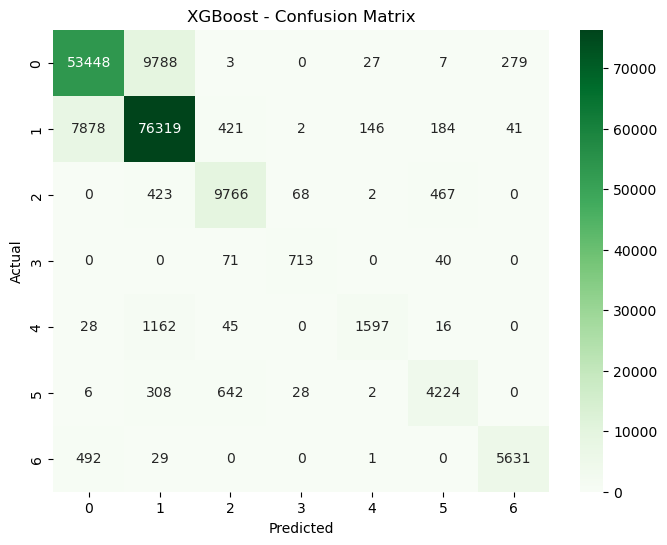

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import xgboost as xgb

try:
    data = pd.read_csv("covtype.csv")
    print(" Dataset loaded with headers.")
except Exception as e:
    print(" Headered read failed:", e)
    data = pd.read_csv("covtype.csv", header=None)
    print(" Dataset loaded without headers.")

#  Print the actual column names or preview
print(" Shape:", data.shape)
print(" Columns:", data.columns.tolist())
print(data.head())

# Auto-detect target column (usually last one)
target_col = data.columns[-1]
print(f"\n Using '{target_col}' as the target column.")
print(" Target value counts:\n", data[target_col].value_counts())

# Features and target
X = data.drop(columns=target_col)
y = data[target_col]

#  Fix class labels for XGBoost (must start from 0)
y_xgb = y - 1

#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

#  Train-test split for XGBoost (with 0-based labels)
_, _, y_train_xgb, y_test_xgb = train_test_split(
    X, y_xgb, test_size=0.3, random_state=42, stratify=y_xgb
)

#  Model 1: Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

#  Confusion Matrix (Random Forest)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#  Feature Importance (Random Forest)
importances = rf.feature_importances_
indices = np.argsort(importances)[-10:][::-1]
plt.figure(figsize=(8, 6))
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), [X.columns[i] for i in indices], rotation=45)
plt.title("Top 10 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()

# Model 2: XGBoost
xgb_model = xgb.XGBClassifier(
    objective="multi:softmax", num_class=7, random_state=42
)
xgb_model.fit(X_train, y_train_xgb)
y_pred_xgb = xgb_model.predict(X_test)

#  Shift prediction back to match original labels
y_pred_xgb += 1

print("\n XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

#  Confusion Matrix (XGBoost)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt="d", cmap="Greens")
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
